In [1]:
'''
Plot model forecast avaibility
'''

%matplotlib inline
%load_ext autoreload
%autoreload
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt, mpld3
from collections import OrderedDict
import itertools
import numpy as np
import numpy.ma as ma
import pandas as pd
import struct
import os
import xarray as xr
import glob
import datetime
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import seaborn as sns

import esio
import esiodata as ed

# General plotting settings
sns.set_style('whitegrid')
sns.set_context("talk", font_scale=1.5, rc={"lines.linewidth": 2.5})

/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  Fi

In [2]:
# Define models and variables to plot
runType = 'forecast'
variables = ['sic']

In [3]:
# def plot_availability(cm):
#     f = plt.figure(figsize=(20,4))
#     plt.title(E.model[cm.model.item()]['model_label'])
#     plt.pcolormesh(cm.fore_time.values.astype('timedelta64[D]').astype('int'), cm.init_time,  cm.data, cmap=cmap )
#     cbar = plt.colorbar()
#     cbar.set_ticks([0.25, 0.75])
#     cbar.set_ticklabels(['Not Available', 'Available'])
#     plt.gcf().autofmt_xdate()
#     plt.xlabel('Forecast Lead (Days)')
#     plt.ylabel('Initialization Date')
#     return f

In [4]:
ctime = np.datetime64(datetime.datetime.now())
lag_time_30days = ctime - np.timedelta64(30, 'D')


In [5]:
#############################################################
# Load in Data
#############################################################
E = ed.esiodata.load()

# cmap_c = itertools.cycle(sns.color_palette("Set2", len(E.model.keys()) ))
# markercycler = itertools.cycle(["*","o","s","v","x"])
# linecycler = itertools.cycle(["-","--","-.",":","--"])

Plotting model  gfdlsipn
Plotting model  piomas
Skipping model piomas no forecast files found.
Plotting model  yopp
Plotting model  bom
Plotting model  cma
Plotting model  ecmwf
Plotting model  hcmr
Plotting model  isaccnr
Plotting model  jma
Plotting model  metreofr
Plotting model  ukmo
Plotting model  eccc
Plotting model  kma
Plotting model  ncep
Plotting model  ukmetofficesipn
Plotting model  ecmwfsipn


Text(0.5,1,'Availbility of Initialization Dates')

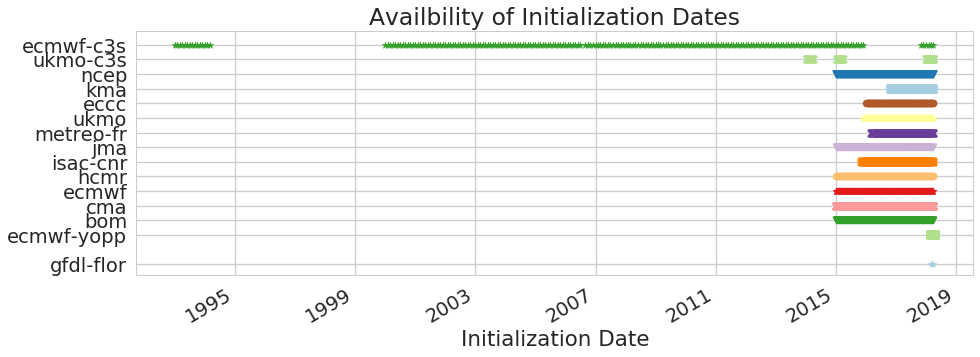

In [7]:
cvar = 'sic'
yticks1 = []
yticklabels1 = []
# Plot simple time line of init_times
f = plt.figure(figsize=(15,5))
fig_dir = os.path.join(E.fig_dir, 'model', 'all_model', cvar)
for (i_cm, c_model) in enumerate(E.model.keys()):
# for (i_cm, c_model) in enumerate(['ukmo','gfdlsipn']):
    print("Plotting model ", c_model)
    # Load in Model
    model_forecast = os.path.join(E.model[c_model][runType]['sipn_nc'], '*.nc')
    # Check we have files 
    files = glob.glob(model_forecast)
    if not files:
        print("Skipping model", c_model, "no forecast files found.")
        continue # Skip this model
    ds_model = xr.open_mfdataset(model_forecast)
    ds_model.rename({'nj':'x', 'ni':'y'}, inplace=True)

    # Set attributes
#         ds_model.attrs['model_label'] = E.model[c_model]['model_label']

    # Select var of interest
    ds_model = ds_model[cvar]

    # Get model plotting specs
    cc = E.model_color[c_model]
    cm = E.model_marker[c_model]

    x = ds_model.init_time.values
    y = [i_cm for i in np.arange(0,x.size)]
    plt.scatter(x, y, s=50, 
                    facecolors=cc, edgecolors=cc, 
                    marker=cm, label=E.model[c_model]['model_label'])
    yticks1.append(i_cm)
    yticklabels1.append(E.model[c_model]['model_label'])

plt.gcf().autofmt_xdate()
plt.xlabel('Initialization Date')
plt.gca().set_yticks(yticks1)
plt.gca().set_yticklabels(yticklabels1)
f.savefig(os.path.join(fig_dir,'Init_avail.png'),bbox_inches='tight',dpi=200)
plt.title('Availbility of Initialization Dates')

Plotting model  gfdlsipn
Plotting model  piomas
Skipping model piomas no forecast files found.
Plotting model  yopp
Plotting model  bom
Plotting model  cma
Plotting model  ecmwf
Plotting model  hcmr
Plotting model  isaccnr
Plotting model  jma
Plotting model  metreofr
Plotting model  ukmo
Plotting model  eccc
Plotting model  kma
Plotting model  ncep
Plotting model  ukmetofficesipn
Plotting model  ecmwfsipn


Text(0.5,1,'Availbility of Initialization Dates')

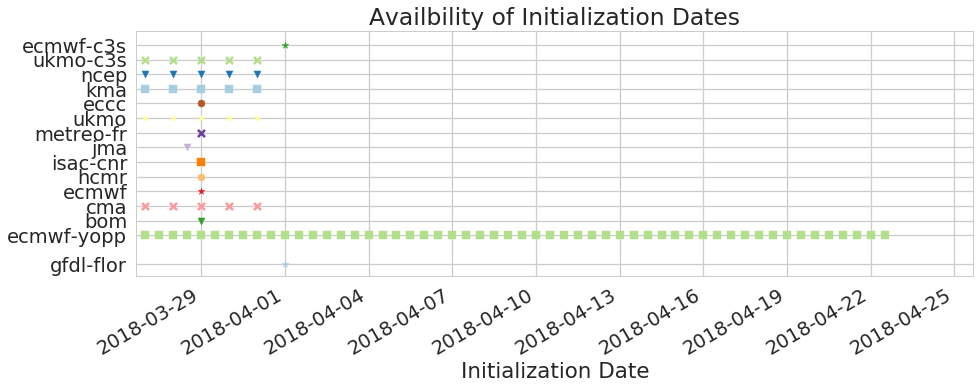

In [8]:
cvar = 'sic'
yticks1 = []
yticklabels1 = []
# Plot simple time line of init_times
f = plt.figure(figsize=(15,5))
fig_dir = os.path.join(E.fig_dir, 'model', 'all_model', cvar)
for (i_cm, c_model) in enumerate(E.model.keys()):
# for (i_cm, c_model) in enumerate(['ukmo','gfdlsipn']):
    print("Plotting model ", c_model)
    # Load in Model
    model_forecast = os.path.join(E.model[c_model][runType]['sipn_nc'], '*.nc')
    # Check we have files 
    files = glob.glob(model_forecast)
    if not files:
        print("Skipping model", c_model, "no forecast files found.")
        continue # Skip this model
    ds_model = xr.open_mfdataset(model_forecast)
    ds_model.rename({'nj':'x', 'ni':'y'}, inplace=True)

    # Set attributes
#         ds_model.attrs['model_label'] = E.model[c_model]['model_label']

    # Select var of interest
    ds_model = ds_model[cvar]

    # Get model plotting specs
    cc = E.model_color[c_model]
    cm = E.model_marker[c_model]

    x = ds_model.init_time.values
    y = [i_cm for i in np.arange(0,x.size)]
    plt.scatter(x, y, s=50, 
                    facecolors=cc, edgecolors=cc, 
                    marker=cm, label=E.model[c_model]['model_label'])
    yticks1.append(i_cm)
    yticklabels1.append(E.model[c_model]['model_label'])

plt.xlim([lag_time_30days,ctime])
plt.gcf().autofmt_xdate()
plt.xlabel('Initialization Date')
plt.gca().set_yticks(yticks1)
plt.gca().set_yticklabels(yticklabels1)
f.savefig(os.path.join(fig_dir,'Init_avail_recent.png'),bbox_inches='tight',dpi=200)
plt.title('Availbility of Initialization Dates')

Plotting model  gfdlsipn
Plotting model  piomas
Skipping model piomas no forecast files found.
Plotting model  yopp
Plotting model  bom
Plotting model  cma
Plotting model  ecmwf
Plotting model  hcmr
Plotting model  isaccnr
Plotting model  jma
Plotting model  metreofr
Plotting model  ukmo
Plotting model  eccc
Plotting model  kma
Plotting model  ncep
Plotting model  ukmetofficesipn
Plotting model  ecmwfsipn


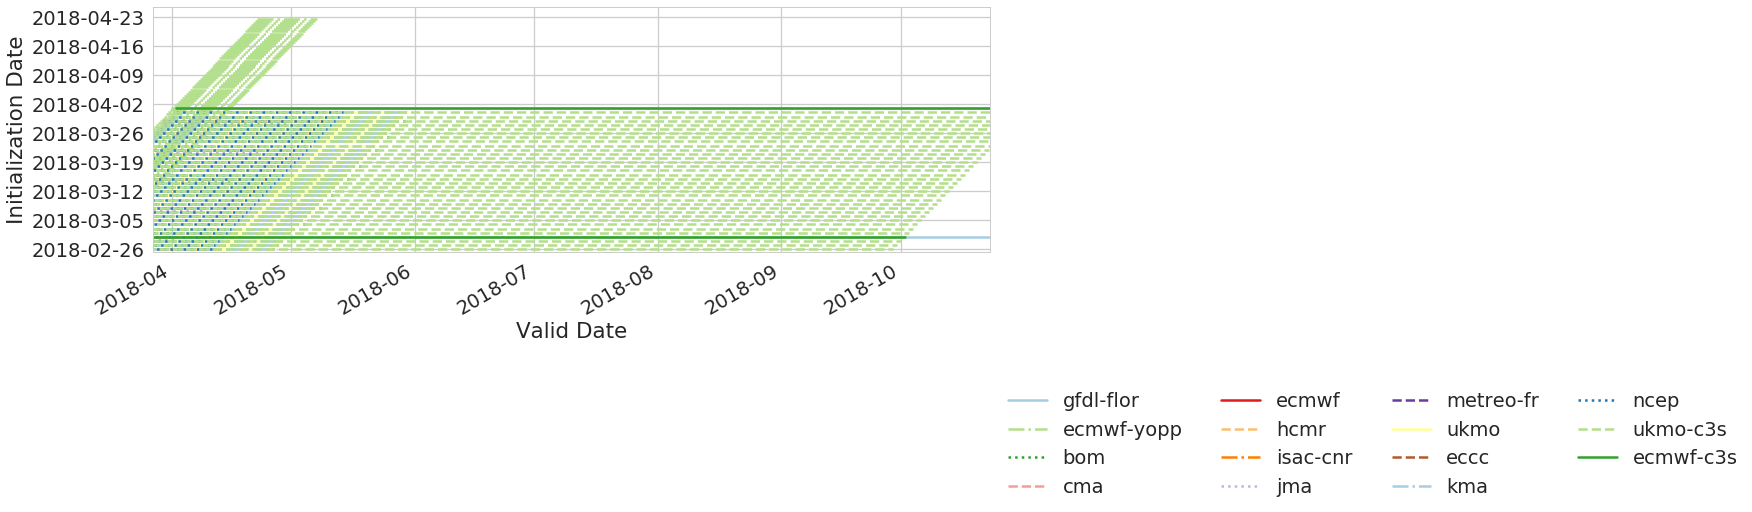

In [10]:
# Recent init_time VS. fore_time plot
c_xlim = [datetime.datetime.now() - datetime.timedelta(days=30), 
          datetime.datetime.now() + datetime.timedelta(days=30*6)]
c_ylim = [datetime.datetime.now() - datetime.timedelta(days=60), 
          datetime.datetime.now() - datetime.timedelta(days=1)]
for cvar in variables:

    fig_dir = os.path.join(E.fig_dir, 'model', 'all_model', cvar)
    if not os.path.exists(fig_dir):
        os.makedirs(fig_dir)
    
    f = plt.figure(figsize=(15,5))
    for c_model in E.model.keys():
#     for c_model in ['yopp','gfdlsipn']:
        print("Plotting model ", c_model)
        # Load in Model
        model_forecast = os.path.join(E.model[c_model][runType]['sipn_nc'], '*.nc')
        # Check we have files 
        files = glob.glob(model_forecast)
        if not files:
            print("Skipping model", c_model, "no forecast files found.")
            continue # Skip this model
        ds_model = xr.open_mfdataset(model_forecast)
        ds_model.rename({'nj':'x', 'ni':'y'}, inplace=True)

        # Set attributes
        ds_model.attrs['model_label'] = E.model[c_model]['model_label']

        # Select var of interest
        ds_model = ds_model[cvar]

        # Check if any data for each init/fore time
        #ds_model = ds_model.notnull().any(dim='x').any(dim='y').astype('int')
        ds_model['valid_time'] = ds_model.init_time + ds_model.fore_time

        # Plot
        cc = E.model_color[c_model]
        cl = E.model_linestyle[c_model]
        haslabel = False
        for it in ds_model.init_time:
            if haslabel:
                clabel = '_nolegend_'
            else:
                clabel = E.model[c_model]['model_label']
                
            x = ds_model.sel(init_time=it).valid_time.values
            y = [ds_model.sel(init_time=it).init_time.values for k in np.arange(0,x.size)]
            plt.plot([x[0],x[-1]], [y[0],y[-1]], color=cc, label=clabel, linestyle=cl)
#             plt.scatter(x, y, s=50, 
#                         facecolors=cc, edgecolors=cc, 
#                         label=clabel, marker=cmarker)
            haslabel = True

    plt.xlim(c_xlim)
    plt.ylim(c_ylim)
    plt.gcf().autofmt_xdate()
    plt.xlabel('Valid Date')
    plt.ylabel('Initialization Date')
    #plt.axis('tight')
    plt.legend(ncol=int(len(E.model.keys())/4), bbox_to_anchor=(1, -0.5))
    # End of all models
    f.savefig(os.path.join(fig_dir,'DataAvailable_'+cvar+'.png'),bbox_inches='tight',dpi=200)
#     mpld3.save_html(f, os.path.join(fig_dir,'DataAvailable_'+cvar+'.html'))
